<a href="https://colab.research.google.com/github/reysilvaa/PCVK/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Masukkan nilai kecerahan: 200


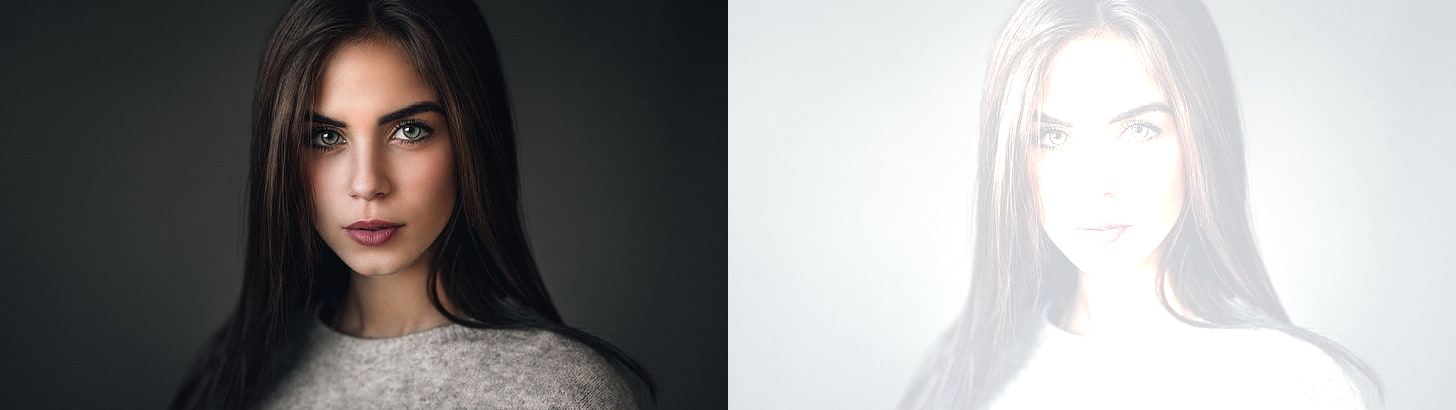

In [ ]:
# Masukkan nilai kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print("Error, not a number")

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel untuk mengubah tingkat kecerahan
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Gabungkan gambar asli dan gambar yang sudah diubah kecerahannya
final_frame = cv.hconcat([original, brightness_image])

# Tampilkan hasil
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

## 1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:




**Invers Warna**

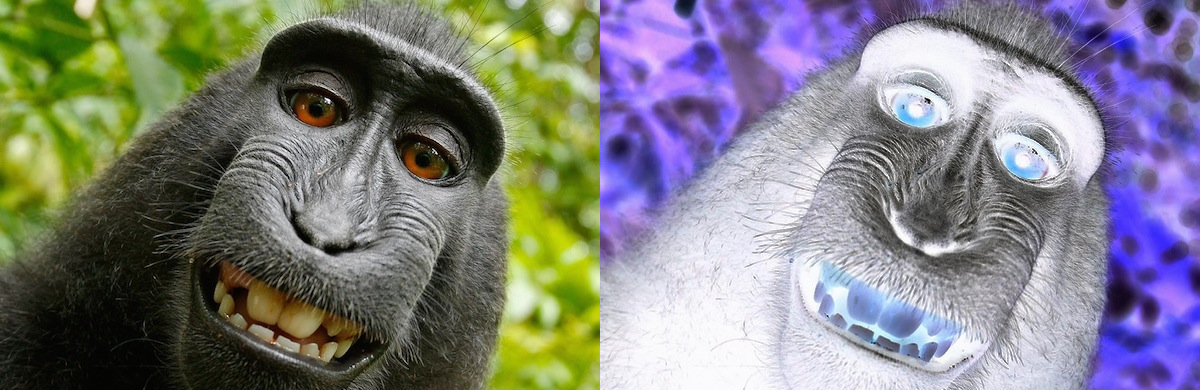

In [ ]:

# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/monyet.jpg')

# Inversi citra menggunakan formula I' = 255 - I
inverse_image = 255 - image

# Gabungkan gambar asli dan gambar yang di-inversi
final_frame = cv.hconcat([image, inverse_image])

# Tampilkan hasil
cv2_imshow(final_frame)

## 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut

**Mengubah contrast dan tingkat kecerahan**

Masukkan tingkat kecerahan [-255 - 255]: 100
Masukkan kontras [1.0 - 3.0]: 2


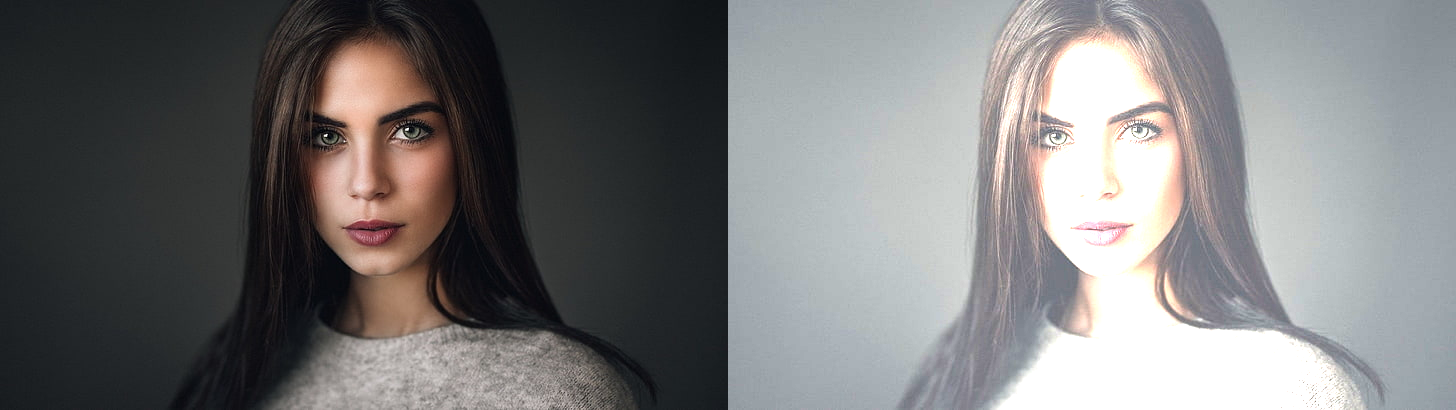

In [ ]:
# Fungsi untuk mengubah kontras dan kecerahan
def adjust_contrast_brightness(image, contrast, brightness):
    # Pastikan nilai kontras dan kecerahan berada dalam rentang yang valid
    contrast = min(max(contrast, 1.0), 3.0)
    brightness = min(max(brightness, -255), 255)

    # Menerapkan transformasi kontras dan kecerahan
    adjusted_image = cv.convertScaleAbs(image, alpha=contrast, beta=brightness)
    return adjusted_image

# Membaca gambar dari file
image = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')

# Meminta input dari pengguna
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Mengubah kontras dan kecerahan gambar
adjusted_image = adjust_contrast_brightness(image, contrast, brightness)

# Gabungkan gambar asli dan gambar yang sudah diubah
final_frame = cv.hconcat([image, adjusted_image])

# Tampilkan hasil
cv2_imshow(final_frame)


## 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Masukkan nilai kecerahan: 12


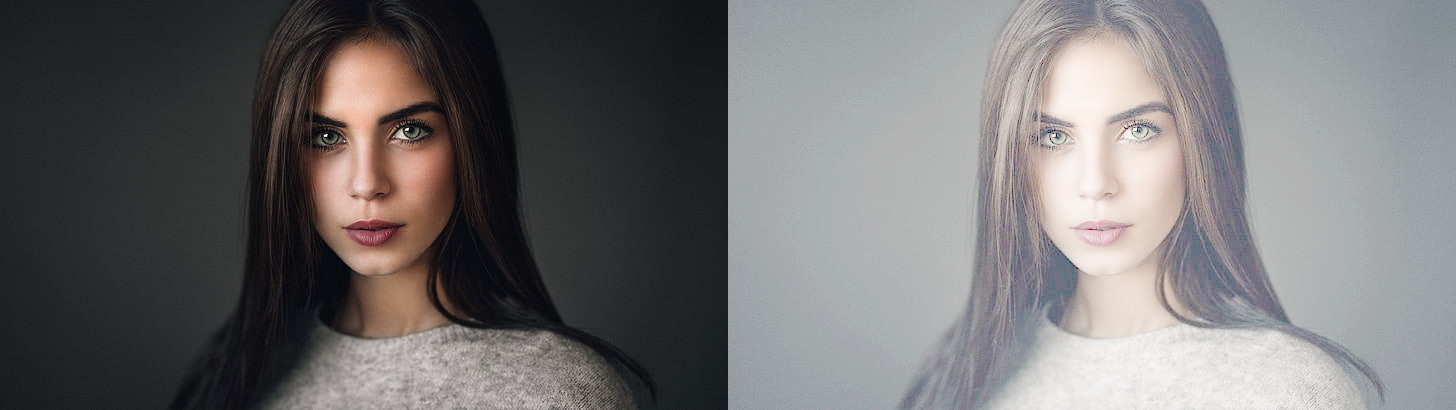

In [ ]:
# Fungsi untuk menerapkan transformasi logaritmik pada citra
def log_transform(image, c):
    # Konversi citra ke format float
    image = np.float32(image)

    # Terapkan transformasi logaritmik
    result = c * np.log(1 + image)

    # Normalisasi hasil sehingga berada dalam rentang 0 hingga 255
    result = np.uint8(255 * result / np.max(result))

    return result

# Membaca gambar dari file
image = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')

# Cek apakah gambar berhasil dibaca
if image is None:
    print("Gambar tidak ditemukan!")
else:
    # Masukkan nilai kecerahan dari user
    c = float(input("Masukkan nilai kecerahan: "))

    # Terapkan transformasi logaritmik
    output_image = log_transform(image, c)

    # Gabungkan gambar asli dan gambar yang sudah diubah
    final_frame = cv.hconcat([image, output_image])

    # Tampilkan hasil
    # Use cv2_imshow from google.colab.patches instead of cv.imshow
    from google.colab.patches import cv2_imshow
    cv2_imshow(final_frame)

## 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


### a. Averaging


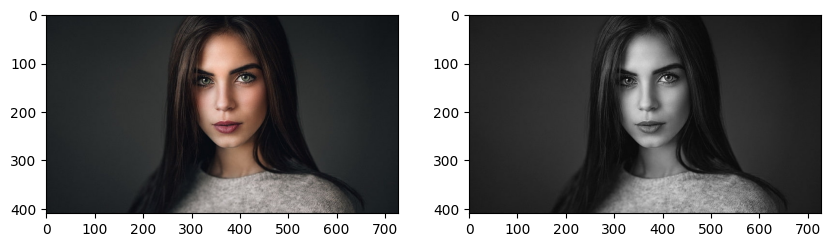

In [ ]:

# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan averaging
grayscale_avg = np.mean(image_float, axis=2)

# Mengubah gambar grayscale ke tipe uint8
grayscale_avg = np.uint8(grayscale_avg)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_avg = cv.resize(grayscale_avg, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

### b. Lightness

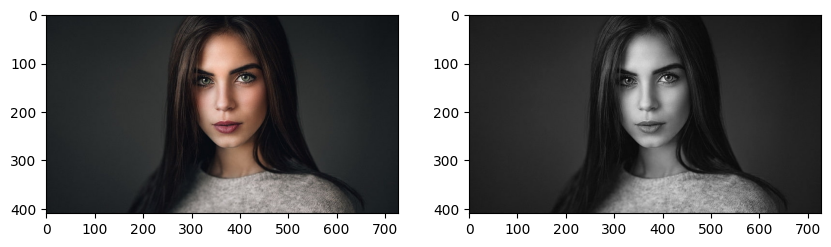

In [ ]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan lightness
max_channel = np.max(image_float, axis=2)
min_channel = np.min(image_float, axis=2)
grayscale_lightness = (max_channel + min_channel) / 2

# Mengubah gambar grayscale ke tipe uint8
grayscale_lightness = np.uint8(grayscale_lightness)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_lightness = cv.resize(grayscale_lightness, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_lightness , cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

### c. Luminance

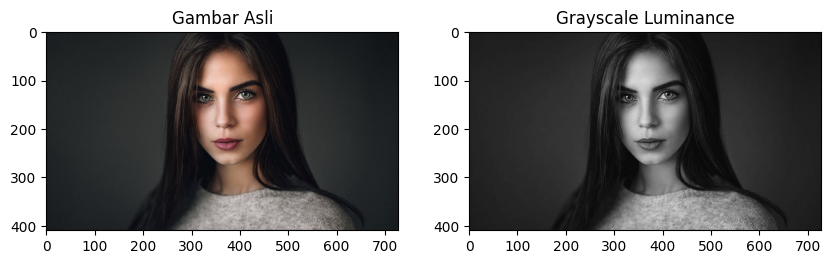

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menghitung grayscale berdasarkan luminance
def grayscale_luminance(image):
    # Ekstraksi kanal RGB
    B, G, R = cv.split(image)

    # Menghitung luminance
    luminance = 0.299 * R + 0.587 * G + 0.114 * B

    return luminance

# Membaca gambar dari file
img = cv.imread('/content/drive/MyDrive/PCVK/Images/girl.jpg')
image = img.astype(np.float32)

# Cek apakah gambar berhasil dibaca
if image is None:
    print("Gambar tidak ditemukan!")
else:
    # Terapkan konversi grayscale berdasarkan luminance
    gray_image = grayscale_luminance(image)

    # Mengubah gambar grayscale ke tipe uint8
    gray_image = np.uint8(gray_image)

    # Menyiapkan subplot
    plt.figure(figsize=(10, 5))

    # Menampilkan gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Konversi BGR ke RGB
    plt.title('Gambar Asli')
    plt.axis('on')

    # Menampilkan gambar grayscale
    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')  # Menampilkan grayscale dengan colormap gray
    plt.title('Grayscale Luminance')
    plt.axis('on')

    plt.show()


## 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut

Pilih warna (R = Red, G = Green, B = Blue): R


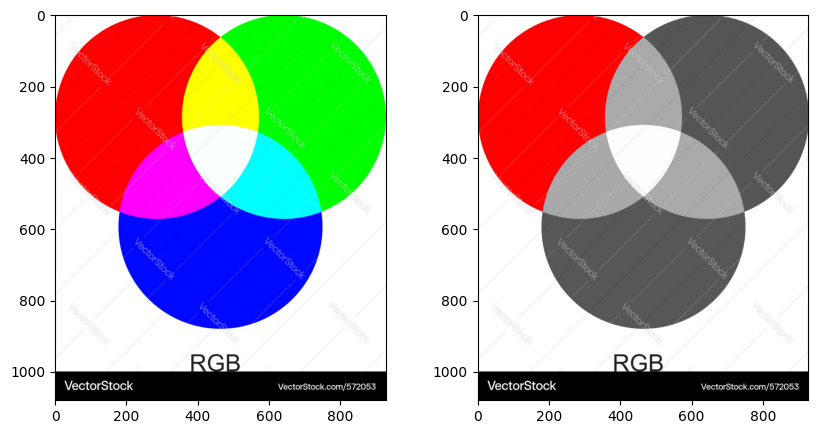

In [ ]:

def highlight_color(image, color_choice):
    # Rentang warna dalam format BGR (Blue, Green, Red)
    if color_choice == 'R':
        lower_bound = np.array([0, 0, 100], dtype=np.uint8)
        upper_bound = np.array([100, 100, 255], dtype=np.uint8)
    elif color_choice == 'G':
        lower_bound = np.array([0, 100, 0], dtype=np.uint8)
        upper_bound = np.array([100, 255, 100], dtype=np.uint8)
    elif color_choice == 'B':
        lower_bound = np.array([100, 0, 0], dtype=np.uint8)
        upper_bound = np.array([255, 100, 100], dtype=np.uint8)
    else:
        raise ValueError("Color choice must be 'R', 'G', or 'B'")

    # Mengubah gambar ke tipe float32 untuk presisi
    image_float = image.astype(np.float32)

    # Menghitung gambar grayscale menggunakan averaging
    grayscale_avg = np.mean(image_float, axis=2)
    grayscale_avg = np.uint8(grayscale_avg)

    # Membuat mask untuk warna yang dipilih
    mask_color = cv.inRange(image, lower_bound, upper_bound)

    # Membuat gambar output yang sama dengan gambar asli
    output = np.copy(image)

    # Ubah piksel yang tidak sesuai warna yang dipilih menjadi grayscale
    output[mask_color == 0] = cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR)[mask_color == 0]

    return output

# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Images/rgb.jpg')

# Minta input warna dari pengguna
color_choice = input("Pilih warna (R = Red, G = Green, B = Blue): ").strip().upper()

# Highlight warna yang dipilih dan ubah bagian lain menjadi grayscale
output_image = highlight_color(image, color_choice)

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar dengan warna yang dipilih tetap dan lainnya grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('on')

plt.show()